In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Caravan.csv')
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [3]:
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [4]:
df['Purchase'].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [5]:
y = df['Purchase']
scale = StandardScaler()
X = scale.fit_transform(df.drop(['Purchase'], axis=1))

In [6]:
train_X = X[1000:]
train_y = y[1000:]

test_X = X[:1000]
test_y = y[:1000]

<h2>K-Nearest Neighbors</h2>

In [7]:
from sklearn.neighbors import KNeighborsClassifier 

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)

predictions = knn.predict(test_X)
cm = confusion_matrix(predictions, test_y)
print('Confusion Matrix\n', cm)

Confusion Matrix
 [[873  50]
 [ 68   9]]


In [9]:
#Out of (68+9) predicted 'yes', 9 of them is predicted correctly.
#Dataset contains just 6% of 'yes' data. So it seems the model is better than random guessing
print(9/(68+9))

0.11688311688311688


Text(0, 0.5, 'fraction of predicted yes came true')

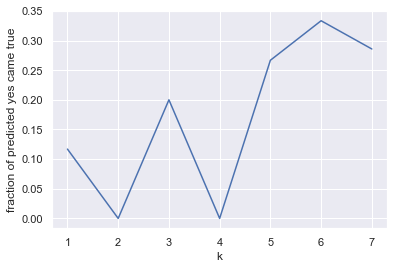

In [10]:
Scores = []
k = [i for i in range(1,8)]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X, train_y)
    predictions = knn.predict(test_X)
    cm = confusion_matrix(predictions, test_y)
    Scores.append(cm[1,1]/(cm[1,0]+cm[1,1]))
sns.set_theme()
plt.plot(k, Scores)
plt.xlabel('k')
plt.ylabel("fraction of predicted yes came true")

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)
predictions = knn.predict(test_X)
cm = confusion_matrix(predictions, test_y)
print('Confusion Matrix\n', cm)

Confusion Matrix
 [[930  55]
 [ 11   4]]
